# 울산광역시 CCTV 현황 탐색

* 울산광역시 CCTV: http://data.ulsan.go.kr/user/apimng/dataset/totalView.ulsan?searchCondition=REG_TITLE&postSearch=cctv&searchRegGroup=&apiRegSid=44&regType=&orderField=REGISTER_DATE&orderSort=DESC&menuCd=DOM_000000101005000000&pageIndex=1&regGroupArr=&offerInstArr=#read/page=1&perPage=10
* 행정안전부 주민등록인구: https://jumin.mois.go.kr/

In [ ]:
pip install pandas

     |████████████████████████████████| 4.7 MB 1.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pandas: filename=pandas-1.3.1-cp38-cp38-macosx_11_0_arm64.whl size=10057237 sha256=15ae283849f7d3d40bd84411d0baaca9e9c0127f5bbf42a1324a23928fa0bbd6
  Stored in directory: /Users/spring/Library/Caches/pip/wheels/0f/3c/cf/67fba037689cf5dc72823acb97fb61cdf6e0b14487453bd08d
Successfully built pandas
You should consider upgrading via the '/Users/spring/miniforge3/envs/deep/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

In [ ]:
!pip install plotly
pd.options.plotting.backend = 'plotly'

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

# 울산 CCTV "ulsan_cctv.csv" 불러오기

In [ ]:
cctv = pd.read_csv('./data/ulsan_cctv.csv', encoding='cp949')
cctv

,고유번호,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,경도,위도,데이터기준일자
0,379297,울산광역시 울주군청,NaN,울산광역시 울주군 범서읍 구영리 397-14,어린이보호,2,200,NaN,30,2020-12,052-204-0030,129.246708,35.567494,2020-02-25
1,379296,울산광역시 울주군청,NaN,울산광역시 울주군 온양읍 대안리 417,어린이보호,1,200,NaN,30,2020-12,052-204-0030,129.281470,35.408266,2020-02-25
2,379295,울산광역시 울주군청,NaN,울산광역시 울주군 온양읍 운화리 47-8,어린이보호,1,200,NaN,30,2020-12,052-204-0030,129.281236,35.413830,2020-02-25
3,379294,울산광역시 울주군청,NaN,울산광역시 울주군 언양읍 동부리 375-3,어린이보호,1,200,NaN,30,2020-12,052-204-0030,129.126308,35.570797,2020-02-25
4,379293,울산광역시 울주군청,NaN,울산광역시 울주군 온양읍 대안리 183-3,어린이보호,1,200,NaN,30,2020-12,052-204-0030,129.287578,35.409694,2020-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,376845,울산광역시 동구청,울산광역시 동구 남목7길 17,울산광역시 동구 서부동 482-8,생활방범,1,200,창일할인마트 앞 방향,30,2020-09,052-209-3145,129.423124,35.540934,2020-01-01
2453,376844,울산광역시 동구청,울산광역시 동구 학문로 39,울산광역시 동구 화정동 142-29,생활방범,1,200,명덕여중사거리 앞,30,2020-02,052-209-3145,129.424600,35.503103,2020-01-01
2454,376843,울산광역시 동구청,울산광역시 동구 전하로 2,울산광역시 동구 전하동 544-51,생활방범,1,200,우리은행 오지벌사거리 앞 방향,30,2020-02,052-209-3145,129.430530,35.512369,2020-01-01
2455,376842,울산광역시 동구청,울산광역시 동구 방어진순환도로 473,울산광역시 동구 방어동 928-25,생활방범,1,200,도해노브빌 앞,30,2020-02,052-209-3145,129.419382,35.487526,2020-01-01


## groupby로 카메라대수 집계(sum)하기

### 관리기관별 집계

In [ ]:
cctv_region = cctv.groupby('관리기관명')['카메라대수'].sum().reset_index()
cctv_region

,관리기관명,카메라대수
0,울산광역시 동구청,719
1,울산광역시 북구청,1211
2,울산광역시 울주군청,1110
3,울산광역시 중구,1321


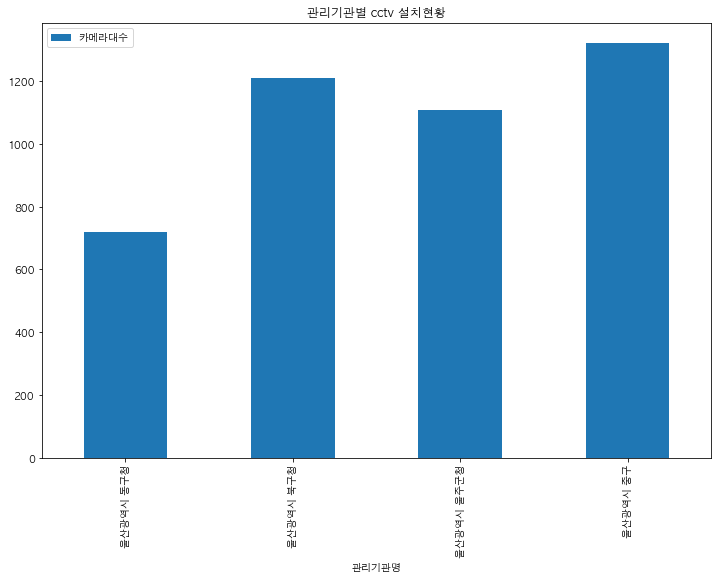

In [ ]:
cctv_region.plot(kind='bar', x='관리기관명', y='카메라대수', title='관리기관별 cctv 설치현황', figsize=(12,8));

### 설치년월 기준으로 집계

In [ ]:
cctv_month = cctv.groupby('설치년월')['카메라대수'].sum().reset_index()
cctv_month

,설치년월,카메라대수
0,2020-01,146
1,2020-02,72
2,2020-03,104
3,2020-04,138
4,2020-05,453
5,2020-06,1310
6,2020-07,356
7,2020-08,521
8,2020-09,323
9,2020-10,188


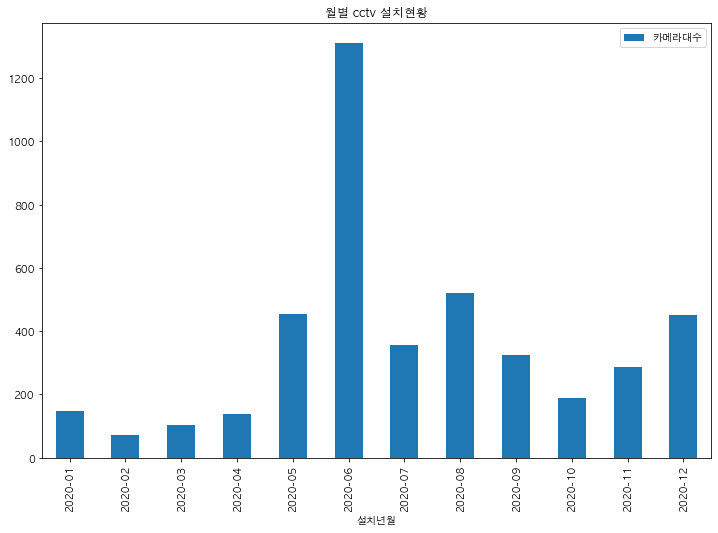

In [ ]:
cctv_month.plot(kind='bar', x='설치년월', y='카메라대수', title='월별 cctv 설치현황', figsize=(12,8));

### 관리기관별 설치목적구분을 기준으로 집계

In [ ]:
cctv.groupby(['관리기관명','설치목적구분'])['카메라대수'].sum().reset_index()

,관리기관명,설치목적구분,카메라대수
0,울산광역시 동구청,생활방범,484
1,울산광역시 동구청,어린이보호,223
2,울산광역시 동구청,차량방범,12
3,울산광역시 북구청,교통단속,166
4,울산광역시 북구청,생활방범,715
5,울산광역시 북구청,쓰레기단속,58
6,울산광역시 북구청,어린이보호,245
7,울산광역시 북구청,재난재해,8
8,울산광역시 북구청,차량방범,19
9,울산광역시 울주군청,생활방범,530


# 울산 인구 "ulsan_population.csv" 불러오기

In [ ]:
raw_pop = pd.read_csv("./data/ulsan_population.csv", encoding="cp949", thousands=",")
pop = raw_pop.copy()

pop

,행정구역,2020년01월_총인구수,2020년01월_세대수,2020년01월_세대당 인구,2020년01월_남자 인구수,2020년01월_여자 인구수,2020년01월_남여 비율,2020년02월_총인구수,2020년02월_세대수,2020년02월_세대당 인구,...,2020년11월_세대당 인구,2020년11월_남자 인구수,2020년11월_여자 인구수,2020년11월_남여 비율,2020년12월_총인구수,2020년12월_세대수,2020년12월_세대당 인구,2020년12월_남자 인구수,2020년12월_여자 인구수,2020년12월_남여 비율
0,울산광역시 (3100000000),1147037,469007,2.45,589233,557804,1.06,1145710,469551,2.44,...,2.39,584305,553040,1.06,1136017,476893,2.38,583708,552309,1.06
1,울산광역시 중구 (3111000000),223060,92994,2.40,113235,109825,1.03,222395,92927,2.39,...,2.34,110500,107596,1.03,217595,93212,2.33,110201,107394,1.03
2,울산광역시 남구 (3114000000),323704,135477,2.39,164993,158711,1.04,323756,135738,2.39,...,2.33,163513,157203,1.04,320064,137925,2.32,163198,156866,1.04
3,울산광역시 동구 (3117000000),159294,65167,2.44,83217,76077,1.09,158809,65189,2.44,...,2.39,82126,74985,1.10,156806,65815,2.38,81999,74807,1.10
4,울산광역시 북구 (3120000000),218053,81382,2.68,112773,105280,1.07,218190,81608,2.67,...,2.62,113325,105557,1.07,219014,83781,2.61,113392,105622,1.07
5,울산광역시 울주군 (3171000000),222926,93987,2.37,115015,107911,1.07,222560,94089,2.37,...,2.32,114841,107699,1.07,222538,96160,2.31,114918,107620,1.07


## DataFrame 변형

+ stack(), unstack() 참고

In [ ]:
pop = pop.set_index('행정구역').stack(0).reset_index()
pop

,행정구역,level_1,0
0,울산광역시 (3100000000),2020년01월_총인구수,1147037.00
1,울산광역시 (3100000000),2020년01월_세대수,469007.00
2,울산광역시 (3100000000),2020년01월_세대당 인구,2.45
3,울산광역시 (3100000000),2020년01월_남자 인구수,589233.00
4,울산광역시 (3100000000),2020년01월_여자 인구수,557804.00
...,...,...,...
427,울산광역시 울주군 (3171000000),2020년12월_세대수,96160.00
428,울산광역시 울주군 (3171000000),2020년12월_세대당 인구,2.31
429,울산광역시 울주군 (3171000000),2020년12월_남자 인구수,114918.00
430,울산광역시 울주군 (3171000000),2020년12월_여자 인구수,107620.00


## 행정구역 번호 제거

In [ ]:
# (xxxxxxxxx) 행정구역 번호 제거
# pop['행정구역'].str[:-13]
pop['행정구역'] = pop['행정구역'].str.split('(').str[0].str.strip()
pop

,행정구역,level_1,0
0,울산광역시,2020년01월_총인구수,1147037.00
1,울산광역시,2020년01월_세대수,469007.00
2,울산광역시,2020년01월_세대당 인구,2.45
3,울산광역시,2020년01월_남자 인구수,589233.00
4,울산광역시,2020년01월_여자 인구수,557804.00
...,...,...,...
427,울산광역시 울주군,2020년12월_세대수,96160.00
428,울산광역시 울주군,2020년12월_세대당 인구,2.31
429,울산광역시 울주군,2020년12월_남자 인구수,114918.00
430,울산광역시 울주군,2020년12월_여자 인구수,107620.00


## "level_1" 열(column)을 나눠서 "기간", "구분" 열(column)으로 만들기

In [ ]:
# date = pop.level_1.str.split("_").str[0]
# cate = pop.level_1.str.split("_").str[1]

# pop.insert(1, '기간', date)
# pop.insert(2, '구분', cate)

# pop.drop(columns='level_1', inplace=True)

# pop.rename(columns={0:'인구수'}, inplace=True)

# pop

In [ ]:
# 기간, 구분 컬럼 생성 및 결합
tmp = pop.level_1.str.split("_", expand=True)
pop = pd.concat([pop['행정구역'], tmp, pop[0]], axis=1)

# 전체 컬럼명 변경
pop.columns = ['행정구역','기간','구분','인구수']

pop.sort_values('구분')

,행정구역,기간,구분,인구수
215,울산광역시 남구,2020년12월,남여 비율,1.04
239,울산광역시 동구,2020년04월,남여 비율,1.10
233,울산광역시 동구,2020년03월,남여 비율,1.10
227,울산광역시 동구,2020년02월,남여 비율,1.09
221,울산광역시 동구,2020년01월,남여 비율,1.09
...,...,...,...,...
228,울산광역시 동구,2020년03월,총인구수,158477.00
222,울산광역시 동구,2020년02월,총인구수,158809.00
216,울산광역시 동구,2020년01월,총인구수,159294.00
366,울산광역시 울주군,2020년02월,총인구수,222560.00


## "구분" 열(column)을 피벗하여 변형하기

In [ ]:
pop_pivot = pop.sort_values('구분').pivot_table(index=['행정구역','기간'], columns='구분')
pop_pivot

인구수                                                
구분                남여 비율    남자 인구수 세대당 인구       세대수    여자 인구수       총인구수
행정구역     기간                                                            
울산광역시    2020년01월  1.06  589233.0   2.45  469007.0  557804.0  1147037.0
         2020년02월  1.06  588626.0   2.44  469551.0  557084.0  1145710.0
         2020년03월  1.06  588127.0   2.43  470294.0  556436.0  1144563.0
         2020년04월  1.06  587902.0   2.43  471153.0  556196.0  1144098.0
         2020년05월  1.06  587434.0   2.42  472255.0  555714.0  1143148.0
...                 ...       ...    ...       ...       ...        ...
울산광역시 중구 2020년08월  1.03  111137.0   2.36   93093.0  108112.0   219249.0
         2020년09월  1.03  110913.0   2.35   93138.0  107949.0   218862.0
         2020년10월  1.03  110780.0   2.35   93207.0  107791.0   218571.0
         2020년11월  1.03  110500.0   2.34   93192.0  107596.0   218096.0
         2020년12월  1.03  110201.0   2.33   93212.0  107394.0   217595.0

[72 rows x 6 columns]

## 2020년 12월 인구 데이터만 남기기

In [ ]:
pop_result = pop[(pop['기간']=='2020년12월') & (pop['행정구역']!='울산광역시')].reset_index(drop=True)
pop_result

,행정구역,기간,구분,인구수
0,울산광역시 중구,2020년12월,총인구수,217595.00
1,울산광역시 중구,2020년12월,세대수,93212.00
2,울산광역시 중구,2020년12월,세대당 인구,2.33
3,울산광역시 중구,2020년12월,남자 인구수,110201.00
4,울산광역시 중구,2020년12월,여자 인구수,107394.00
5,울산광역시 중구,2020년12월,남여 비율,1.03
6,울산광역시 남구,2020년12월,총인구수,320064.00
7,울산광역시 남구,2020년12월,세대수,137925.00
8,울산광역시 남구,2020년12월,세대당 인구,2.32
9,울산광역시 남구,2020년12월,남자 인구수,163198.00


# DataFrame 결합

In [ ]:
# cctv 관리기관명에서 '청' 제거
cctv_region['관리기관명'] = cctv_region['관리기관명'].str.replace("청","")

merge_df = pop_result.set_index('행정구역').join(cctv_region.set_index('관리기관명'))

In [ ]:
# 남구청 결측치 제외
merge_df.dropna(inplace=True)

In [ ]:
merge_df

,기간,구분,인구수,카메라대수
울산광역시 동구,2020년12월,총인구수,156806.00,719.0
울산광역시 동구,2020년12월,세대수,65815.00,719.0
울산광역시 동구,2020년12월,세대당 인구,2.38,719.0
울산광역시 동구,2020년12월,남자 인구수,81999.00,719.0
울산광역시 동구,2020년12월,여자 인구수,74807.00,719.0
울산광역시 동구,2020년12월,남여 비율,1.10,719.0
울산광역시 북구,2020년12월,총인구수,219014.00,1211.0
울산광역시 북구,2020년12월,세대수,83781.00,1211.0
울산광역시 북구,2020년12월,세대당 인구,2.61,1211.0
울산광역시 북구,2020년12월,남자 인구수,113392.00,1211.0


## "총인구수"만 남기고 행정구역별 총인구를 cctv 카메라대수로 나눠 "인구대비cctv" 열(column) 생성하기

In [ ]:
total_df = merge_df.query("구분=='총인구수'")
total_df['인구대비cctv'] = (total_df['인구수'] / total_df['카메라대수']).astype(int)

<ipython-input-21-e6cb5d35bbd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['인구대비cctv'] = (total_df['인구수'] / total_df['카메라대수']).astype(int)


In [ ]:
result = total_df.sort_values('인구대비cctv').reset_index().rename(columns={'index':'행정구역'})
result

,행정구역,기간,구분,인구수,카메라대수,인구대비cctv
0,울산광역시 중구,2020년12월,총인구수,217595.0,1321.0,164
1,울산광역시 북구,2020년12월,총인구수,219014.0,1211.0,180
2,울산광역시 울주군,2020년12월,총인구수,222538.0,1110.0,200
3,울산광역시 동구,2020년12월,총인구수,156806.0,719.0,218


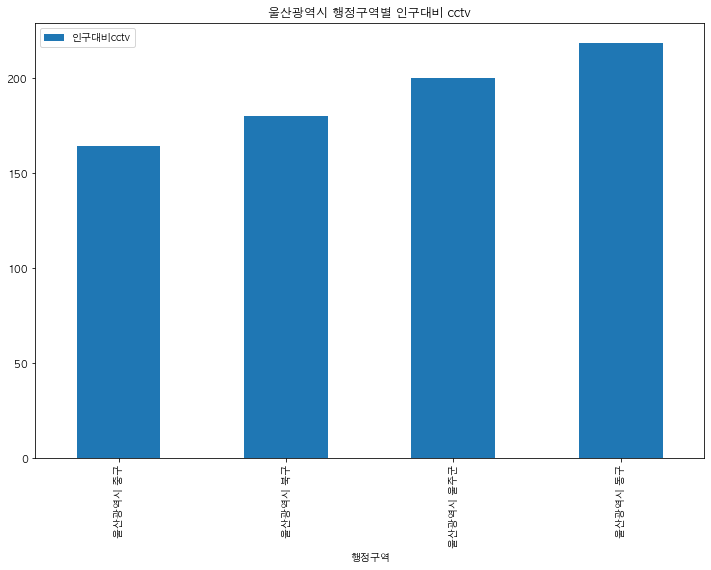

In [ ]:
result.plot(kind='bar', x='행정구역', y='인구대비cctv', title='울산광역시 행정구역별 인구대비 cctv', figsize=(12,8));